# Sheet 07

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Exercise 2: ANOVA

### a) One-Way ANOVA

Explanation in the book: https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf

#### 1) Conditions to apply one-way ANOVA

This test is typically used, when there is a single indepentend variable, with an investigation if different groups have a significant influence on that variable. It can only be applied to at least two groups, but at least three groups are adviced.  

One-way ANOVA is most suitable to statistic analysis of a categorial indepentend variable (e.g. mood of a person) and one quantitative dependent variable (e.g. hours of sleep).

#### 2) How does one-way ANOVA work

**Hypothesis**

This test uses the population's mean values in order to find out, if the null or the alternative hypothesis is **true**.  
* null hypothesis: $H_{0} = \mu_{1} = ... = \mu_{k}$
* alternative hypothesis: $H_{A}:  \mu_{i} \neq \mu_{j}$ (there exists one mean $i$ that is different than to another population's mean $j$)

where $k$ is the number of groups that are compared with.  

**Calculation**

$F = {MS_{between} \over MS_{within}}$

where $MS_{between} = {SS_{between} \over df_{between}}$ and $MS_{within} = {SS_{within} \over df_{within}}$

- $MS$ = "mean squares"
- $SS$ = "sum of squared deviations from the mean" 
- $df$ = "degrees of freedom"
  - for $within$: $N - k$
  - for $between$: $k - 1$
  - $N$ = number of points in the population, $k$ = number of groups
- $between$ = "deviations for between-group sum of squares"
- $within$ = "deviations for within-group sum of squares"

`Within` 
Is calculated with the deviation of each point within one group to their group mean, this is repeated for every group. Therefore, $MS_{within}$ is a good estimation of $\sigma^2$ regardless of the truth of $H_{0}$.

`Between` 
Is calculated with the deviation of each point's group mean to the between-group grand mean. These deviations are then summed and squared to get the $SS_{between}$, which is then divided by $df_{between}$ to get $MS_{between}$. Therefore, the mean squares of between is a good estimation of $\sigma^2$ only if $H_{0}$ is true.

In combination with within group and between-group calculation, the ratio of both is a great represenation if $H_{0}$ is true or not.


#### 3) How can results of one-way ANOVA be interpreted?

* if the value for the `F-Statistic` ($F$) is around $1.0$ then the null hypothesis is **true**, but when this value gets bigger when the alternative hypothesis is **true**.
* also the resulting `p-value` ($p$) is used as a guide to reject or approve the null hypothesis. When $\alpha$ is used as a threshold and $p \le \alpha$ then we can reject $H_{0}$, otherwise if $p > \alpha$, the null hypothesis is **true**.

### b) Apply one-way ANOVA onto a dataset

In [3]:
# import the dataset
df = pd.read_csv('../data/diet.csv')
df

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2
...,...,...,...,...,...,...,...
71,74,Male,35,183,C,83,80.2
72,75,Male,49,177,C,84,79.9
73,76,Male,28,164,C,85,79.7
74,77,Male,40,167,C,87,77.8


Since, one-way ANOVA is a test for finding out whether there exists a statistically significant difference between the mean values of more than one group. Therefore, we need to define our null hypothesis:

$H_{0}$: All diets have the same mean weight loss ($\mu_{1} = \mu_{2} = \mu_{3}$), where 1 is diet 'A', 2 is diet 'B' and 3 is diet 'C'.  
$H_{A}$: The means weight losses of all diets are not equal.

In order to find if there exists a stistically significant difference in the mean weight loss, we need to add a new column to our dataframe - the weight loss as absolute value. 

In [5]:
# add new column to df
df['difference.weight'] = df['initial.weight'] - df['final.weight']
df

,id,gender,age,height,diet.type,initial.weight,final.weight,difference.weight
0,1,Female,22,159,A,58,54.2,3.8
1,2,Female,46,192,A,60,54.0,6.0
2,3,Female,55,170,A,64,63.3,0.7
3,4,Female,33,171,A,64,61.1,2.9
4,5,Female,50,170,A,65,62.2,2.8
...,...,...,...,...,...,...,...,...
71,74,Male,35,183,C,83,80.2,2.8
72,75,Male,49,177,C,84,79.9,4.1
73,76,Male,28,164,C,85,79.7,5.3
74,77,Male,40,167,C,87,77.8,9.2


For one-way ANOVA we need to seperate the three different diets because we want to check if there is a significant difference betweens diets.

In [8]:
# split into three np arrays
diet_a = df[df['diet.type'] == 'A']['difference.weight']
diet_b = df[df['diet.type'] == 'B']['difference.weight']
diet_c = df[df['diet.type'] == 'C']['difference.weight']

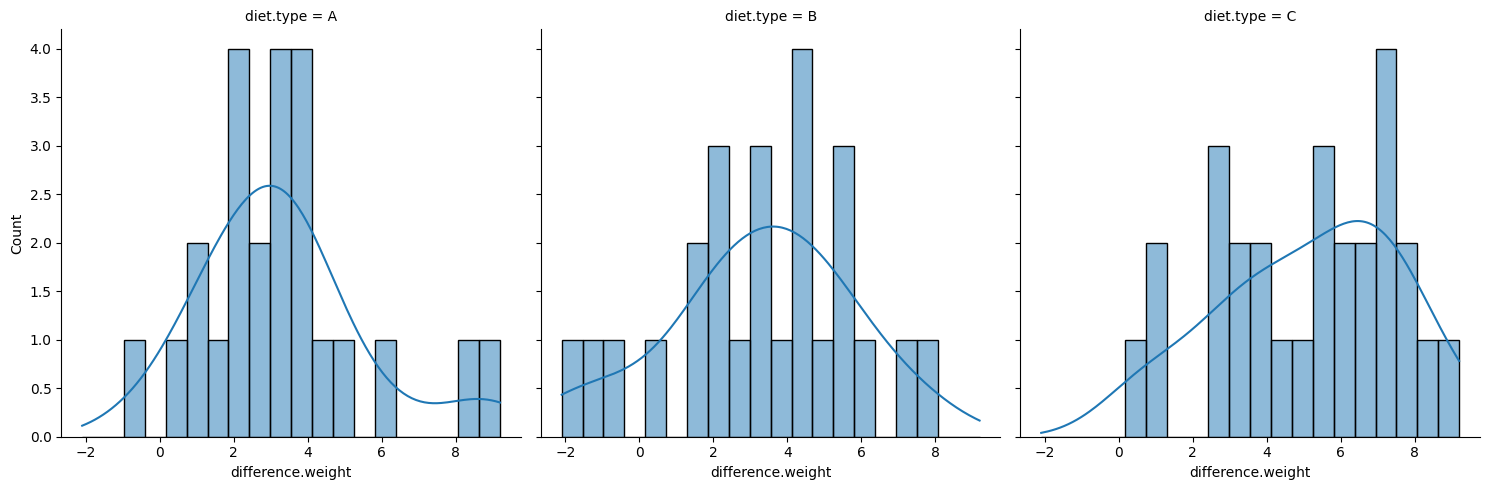

In [45]:
# check for normal distribution with 'displot'
sns.displot(df, x="difference.weight", col="diet.type", kde=True, bins=20)

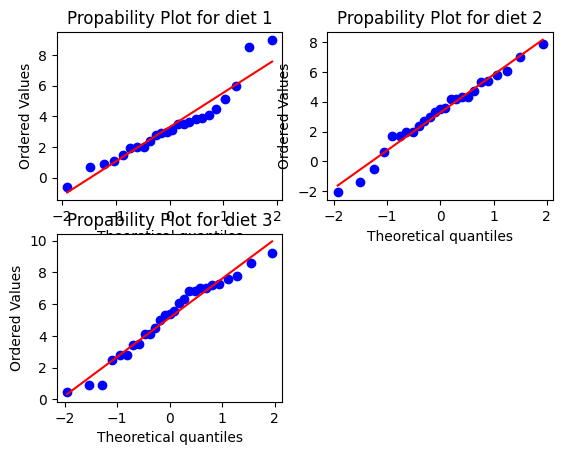

In [44]:
# another graphical test to check normal distribution - with 'probplot'
ax1 = plt.subplot(221)
res1 = stats.probplot(diet_a, dist='norm', plot=plt)
ax1.set_title('Propability Plot for diet 1')

ax2 = plt.subplot(222)
res2 = stats.probplot(diet_b, dist='norm', plot=plt)
ax2.set_title('Propability Plot for diet 2')

ax3 = plt.subplot(223)
res3 = stats.probplot(diet_c, dist='norm', plot=plt)
ax3.set_title('Propability Plot for diet 3')

plt.show()

The graphical investigation showed, that not every group has a perfect normal distribution and therefore we might get $p < \alpha$.

In [19]:
# apply one-way ANOVA
F, p_value = stats.f_oneway(diet_a, diet_b, diet_c)
print(f"F: {F:.3f}\np-value:{p_value:.3f}")

F: 5.383
p-value:0.007


**Conclusion**

One-way ANOVA returned $p < \alpha$ with $F > 1$ and therefore we can reject our null hypothesis. This conducts, that we have statistically significant difference in the mean weight loss among these three diets. 